**1D Non-linear Convection Equation**

In [1]:
from __future__ import division
from casadi import *
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
#from scipy.sparse import diags
from scipy.sparse import csc_matrix

In [2]:
nx = 400
L = 2
Amatrix_data = numpy.hstack((numpy.ones(nx),-1*numpy.ones(nx-1)))
Amatrix_rows = numpy.concatenate([numpy.linspace(0,nx-1,nx),numpy.linspace(1,nx-1,nx-1)])
Amatrix_cols = numpy.concatenate([numpy.linspace(0,nx-1,nx),numpy.linspace(0,nx-2,nx-1)])
A = MX(csc_matrix((Amatrix_data, (Amatrix_rows, Amatrix_cols)), shape=(nx, nx)))
b = numpy.zeros(nx)
b[0] = -1
#print b
x = numpy.linspace(0,L,nx+1)
#print A


[[1, 00, 00, 00], 
 [-1, 1, 00, 00], 
 [00, -1, 1, 00], 
 [00, 00, -1, 1]]


In [154]:
#c = MX.sym('c')

In [155]:
u = MX.sym('u',nx)

In [156]:
dx = MX.sym('dx')

In [157]:
ode = (-u/dx)*(mtimes(A,u) + b)

In [158]:
dae = {'x':u,'p':dx,'ode':ode}

In [159]:
opts = {}
opts["fsens_err_con"] = True
opts["quad_err_con"] = True
opts["abstol"] = 1e-6
opts["reltol"] = 1e-6
tend = 0.2
opts["t0"] = 0
opts["tf"] = tend

In [160]:
dt = 0.001
ts = numpy.linspace(0,tend,tend/dt)

In [161]:
opts["grid"] = ts
opts["output_t0"] = True

In [162]:
F = integrator("F","cvodes",dae,opts)

In [163]:
c = 1; dx = L/nx

In [164]:
print dx

0.005


In [165]:
u0 = numpy.ones(nx)

In [166]:
u0[numpy.intersect1d(numpy.where(x >= 0.5), numpy.where(x <= 1))] = 2

In [167]:
#print u0

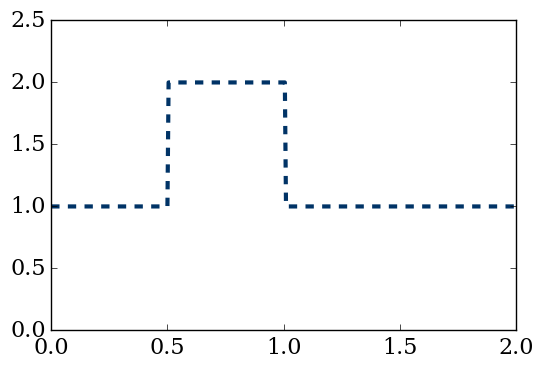

In [168]:
pyplot.plot(x, numpy.insert(u0,0,-b[0]), color='#003366', ls='--', lw=3)
pyplot.ylim(0,2.5);

In [169]:
sol = F(x0 = u0, p = dx)

In [170]:
sol = sol['xf'].full().T

In [171]:
print sol.shape

(200, 400)


In [172]:
#print sol[-1,:]

In [173]:
ufinal = np.insert(sol[-1,:], 0,-b[0])

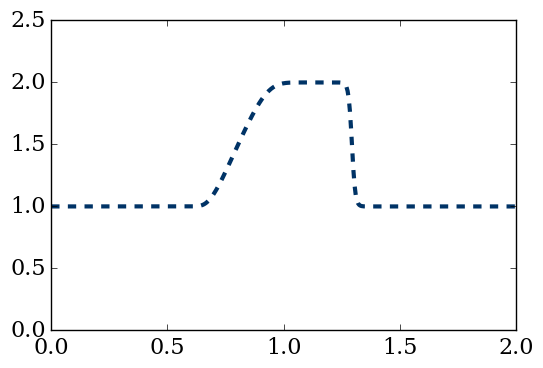

In [174]:
pyplot.plot(x, ufinal, color='#003366', ls='--', lw=3)
pyplot.ylim(0,2.5);